*This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University.
Original versions were created by Asa Ben-Hur and updated by Ross Beveridge.
The content is availabe [on GitHub](https://github.com/asabenhur/CS345).*

*The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*

<a href="https://colab.research.google.com/github//asabenhur/CS345/blob/master/fall22/notebooks/module00_04_matplotlib.ipynb">
  <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Data visualization with Matplotlib


Matplotlib is the "standard" Python data visualization library.
It was originally conceived to provide an alternative to Matlab, and some of its syntax derived from that.  In recent years, it has begun to show its age, and other packages that build on it provide cleaner, more modern APIs.
For example, [seaborn](https://seaborn.pydata.org/), [HoloViews](http://holoviews.org/), [Altair](http://altair-viz.github.io/), and [pandas](https://pandas.pydata.org/) can be used as wrappers for Matplotlib.
However, it is still a good place to start.

Note also that while this notebook is primarily about the mechanics of plotting, it also reviews some key ideas. Namely:

* Normal versus uniform random variables

* Angles between random vectors in $d$ dimensions

* 3d scatterplots 

### Importing Matplotlib

We will use a standard shorthand for importing Matplotlib:

In [1]:
import matplotlib.pyplot as plt

There are several ways to use Matpplotlib, and the `pyplot` API is the one we will most generally use.

### Matplotlib in the Jupyter notebook

To control how Matplotlib displays figures in a Jupyter notebook use the ``%matplotlib`` magic command.  The argument to this command chooses which Matplotlib backend to use.
We will generally use it as ``%matplotlib inline`` which generates static images that are embedded in the notebook.  This is the default behavior, so if that is what you want, there is nothing you need to do.
The other relevant option for Jupyter notebooks is ``%matplotlib notebook`` which will generate *interactive* plots.

In [2]:
%matplotlib inline

We are now ready to generate our first plot:

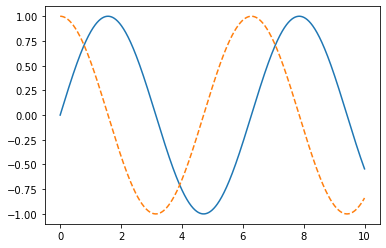

In [3]:
import numpy as np
x = np.linspace(0, 10, 10**3)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

### Saving to file

You can save your Matplotlib figure to a file using the ``savefig()`` command.
The extension used will determine the format.  For example:

In [4]:
fig.savefig('my_figure.png')

We now have a file called ``my_figure.png`` in the current working directory:

In [5]:
!ls -lh my_figure.png

-rw-r--r--  1 asa  staff    20K Jun 20 14:21 my_figure.png


## The two interfaces of Matplotlib 

A potentially confusing feature of Matplotlib is its dual interfaces: a convenient MATLAB-style state-based interface, and a more powerful object-oriented interface.

#### The MATLAB-style Interface

The MATLAB-style API is contained in the pyplot (``plt``) module.
For example, the following code will probably look quite familiar to MATLAB users:

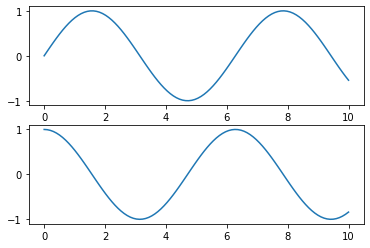

In [6]:
x = np.linspace(0, 10, 100)
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

It is important to note that this interface is *stateful*: it keeps track of the "current" figure and axes, which are where all ``plt`` commands are applied.
You can get a reference to these using ``plt.gcf()`` (get current figure) and ``plt.gca()`` (get current axes).

While this stateful interface is fast and convenient for simple plots, it is easy to run into problems.
For example, once the second panel is created, how can we go back and add something to the first?
This is possible within the MATLAB-style interface, but a bit clunky.
Fortunately, there is a better way.

#### Object-oriented interface

The object-oriented interface is available for these more complicated situations, and for when you want more control over your figure.
Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are *methods* of explicit ``Figure`` and ``Axes`` objects.
For example:

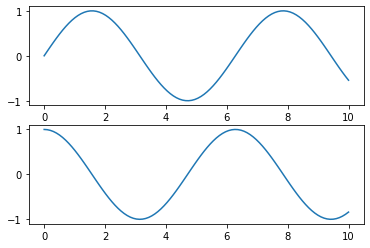

In [7]:
# first create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate Axes object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

Throughout this course, we will switch between the two interfaces, depending on what is most convenient.

## Scatter plots

Scatter plots are one of our "bread-and-butter" methods for visualizing data in two dimensions:

In [8]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=100, n_features=2, n_informative=2, 
                          n_redundant=0, n_repeated=0, n_classes=2, 
                          n_clusters_per_class=1, class_sep=0.4, random_state=1)
X.shape, y.shape

((100, 2), (100,))

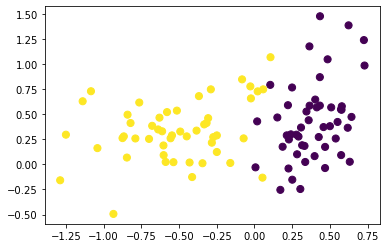

In [9]:
plt.scatter(X[:,0], X[:,1], c=y, alpha=1.0, s=50);

The `s` parameter controls the size of the markers, and like the color parameter, `c`, it can be an array of values.
We can achieve a similar result using `plt.plot`.  However, it does not have the same level of flexibility and it produces markers that are all the same color and size:

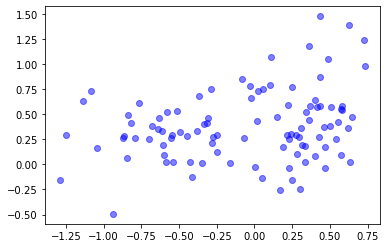

In [10]:
plt.plot(X[:,0], X[:,1], 'ob', alpha=0.5);

## Histograms

As an example we will generate two datasets from a normal distribution and plot their histograms, showing some features of Matplotlib's `hist` function.  The 'normed' flag normalizes the bin heights such that it represents a probability distribution.


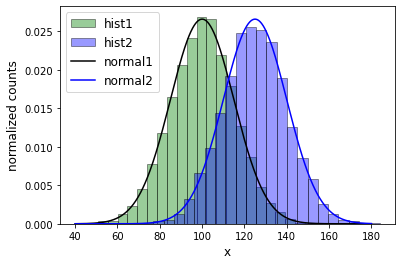

In [11]:
sample_size = 10000
mu = 100
sigma = 15

x1 = mu + sigma * np.random.randn(sample_size)
x2 = mu + 25 + sigma * np.random.randn(sample_size)

num_bins = 25
plt.hist(x1, num_bins, density=True, facecolor='green', alpha=0.4, 
         edgecolor = 'black', label='hist1')
plt.hist(x2, num_bins, density=True, facecolor='blue', alpha=0.4, 
         edgecolor = 'black', label='hist2')
plt.xlabel('x',fontsize=12)
plt.ylabel('normalized counts', fontsize=12)
x = np.linspace(40, 180, 1000)
normal = (1/np.sqrt(2*np.pi*sigma**2))*np.exp(-(x-mu)**2/(2*sigma**2))
plt.plot(x, normal, '-k', label='normal1');

normal = (1/np.sqrt(2*np.pi*sigma**2))*np.exp(-(x-mu-25)**2/(2*sigma**2))
plt.plot(x, normal, '-b', label='normal2');

plt.legend(loc='upper left', fontsize='12');

## More About Color

Going back to scatter plots is a place to look more carefully at colors and color maps.

What if you want to control the color choice?  It becomes important to establish the mapping from the labels `y` to the color used for display.

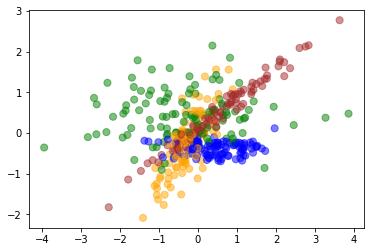

In [21]:
my_colors = ['orange','green','blue','brown']
samples = 400
n_classes = 4
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=samples, n_features=2, n_informative=2, 
                          n_redundant=0, n_repeated=0, n_classes=n_classes, 
                          n_clusters_per_class=1, class_sep=0.4, random_state=1)

plt.scatter(X[:,0], X[:,1], c=[my_colors[label] for label in y], alpha=0.5, s=50);

## Angles Between Random Vectors

This is a nice example going back to the previous lecture on dot products and looking at an interesting aspect of increasing the dimensionality of a feature space.  In particular, pick any two random vectors and compute the angle between them. To this many times and generate a sample probability density (more on that terminology in lecture).  Then show this distribution using a histogram and repeated for different numbers of dimensions/features.

Keep in mind that while in some respects the following is just a useful excercise in coding and plotting, it touches on something rather significant. Namely, in the limit as the size of space increases, the expected angle between any two randomly selected vectors converges upon 90 degrees. Put another way, the two vectors are in expectation orthogonal.  I am still looking for a better citation, but for now here is as starting point if you happen to be interested: [Almost all random vectors are orthogonal](https://keplerlounge.com/applied-math/2020/02/03/orthogonal-vectors.html).

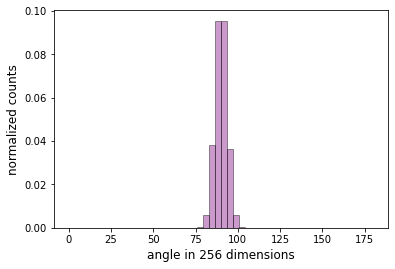

In [15]:
# Try building this plot for different numbers of features.
num_features = 256
sample_size = 10**4

def sample_angle(dim)  :
    A = np.random.uniform(-1.0,1.0, dim) 
    A = A / np.linalg.norm(A)
    B = np.random.uniform(-1.0,1.0, dim) 
    B = B / np.linalg.norm(B)
    theta_rad = np.arccos(A @ B)
    theta_deg = np.degrees(theta_rad)
    return theta_deg

angles = np.array([sample_angle(num_features) for i in range(sample_size)])
num_bins = 50
plt.hist(angles, num_bins, density=True, facecolor='purple', alpha=0.4, 
         edgecolor = 'black', label='angles', range=[0,180])
plt.xlabel('angle in ' + str(num_features) + ' dimensions',fontsize=12)
plt.ylabel('normalized counts', fontsize=12);

## 3D Scatter Plot

When working with high dimensional data the limitation of a 2D display is deeply frurstrating, not to mention our own perceptual limitations - images we view are 2D.  

There is one extra trick we can use, and that involves 3D displays of data either as projections, or better projections plus movement.

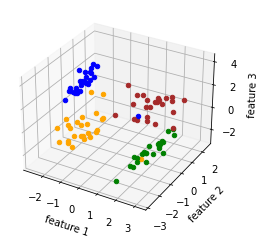

In [19]:
#%matplotlib notebook
my_colors = ['orange','green','blue','brown']
nsam = 100
nfea = 3
n_classes = 4
class_sep = 2.0
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=nsam, n_features=nfea, n_informative=2, 
                          n_redundant=0, n_repeated=0, n_classes=n_classes, 
                          n_clusters_per_class=1, class_sep=class_sep, 
                          random_state=1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(y)) :
    ax.scatter(X[i,0], X[i,1], X[i,2],c=my_colors[y[i]])
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_zlabel('feature 3');

There is much more to Matplotlib than the sampler we have gone through in this notebook, but this should give you more than enough to get started!